## Análisis de dataset del Challenge "VinBigData Chest X-Ray Abnormalities Detection"

Datos disponibles en https://www.kaggle.com/c/vinbigdata-chest-xray-abnormalities-detection/data.

El dataset consiste en 18000 muestras de rayos X: 15000 en el train set, con 67914 patologías labeleadas y 3000 en el test set, todas en formato DICOM, comúnmente utilizado para el registro de estas imágenes médicas.

El procesamiento de estas imágenes se llevó a cabo mediante la librería [Pydicom](https://pydicom.github.io/pydicom/stable/), y su análisis mediante pandas y numpy.


Importamos nuestro script y algunos widgets para ayudar a la visualización:

In [10]:
# IMPORTS
from functions import Datos
from ipywidgets import interact, interactive, IntSlider, ToggleButtons

Cargamos los datos de nuestra sample del dataset, este proceso puede tomar entre un par de segundos a un minuto dependiendo de si cargamos todos los ejemplos o no (todos por defecto).

In [11]:
# CARGA DE LOS DATOS
Data = Datos(all_examples = True)

Cargando 75 ejemplos de 14 patologías distintas...
...............

In [12]:
# RESUMEN EN TABLA DE COMO DISTRIBUYEN LAS DISTINTAS PATOLOGIAS EN EL DATASET
# INPUT: DATASET (test/train)
Data.df_summary("train")

TRAIN SET

TOTAL DE LABELS (Número de filas): 67914 labels
TOTAL DE SAMPLES ÚNICAS: 15000 samples



,Nombre de la Clase,N° de Samples,% del Total
0,Aortic enlargement,7162,10.5%
1,Atelectasis,279,0.4%
2,Calcification,960,1.4%
3,Cardiomegaly,5427,8.0%
4,Consolidation,556,0.8%
5,ILD,1000,1.5%
6,Aortic Infiltration,1247,1.8%
7,Lung Opacity,2483,3.7%
8,Nodule/Mass,2580,3.8%
9,Other lesion,2203,3.2%


<BarContainer object of 15 artists>

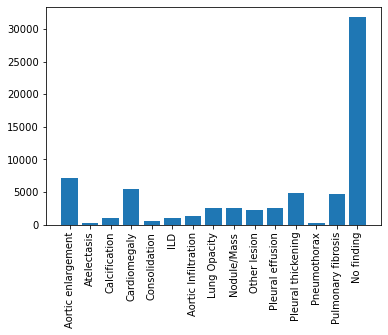

In [13]:
# RESUMEN GRÁFICO DE COMO DISTRIBUYEN LAS DISTINTAS PATOLOGIAS EN EL DATASET
# INPUT: DATASET (test/train)
Data.plot_summary("train")


In [14]:
# FILTRAR LA DATAFRAME SEGÚN LA PATOLOGÍA
# INPUTS:
# ID PATOLOGÍA (0-14)
# DATASET (test/train)
Data.filter_id(0, "train")

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
8,d3637a1935a905b3c326af31389cb846,Aortic enlargement,0,R10,1329.0,743.0,1521.0,958.0
14,321c111713c3ee5385db0effb54ff568,Aortic enlargement,0,R8,1292.0,554.0,1477.0,805.0
18,5da264775732004f1b724b660138854a,Aortic enlargement,0,R9,1635.0,673.0,1978.0,1151.0
19,fb8e11c6b2886b2d41b379e0598669b9,Aortic enlargement,0,R10,1390.0,878.0,1616.0,1163.0
...,...,...,...,...,...,...,...,...
67871,cf32a2bc41deeb7436a36bcc4ff324fb,Aortic enlargement,0,R11,1496.0,977.0,2072.0,1244.0
67873,b41fd5f3e08360e72cc4d73a83a1b610,Aortic enlargement,0,R10,986.0,579.0,1252.0,825.0
67885,f4da0959856bcdd4b91e0c6949b109e3,Aortic enlargement,0,R9,1567.0,827.0,1830.0,1124.0
67887,8ef3fb1b703ffcb77d3709d45adf8695,Aortic enlargement,0,R8,1359.0,772.0,1628.0,1051.0


In [15]:
# SLIDER INTERACTIVO PARA PODER OBSERVAR LOS EJEMPLOS DEL DATASET
# ID CLASE: TIPO DE PATOLOGIA DADA POR SU ID
# NUM EJEMPLO: EJEMPLO DENTRO DE LA PATOLOGÍA
interact(Data.ejemplo, id_clase_patologia = (0, 14), num_ejemplo = (0,4))

interactive(children=(IntSlider(value=7, description='id_clase_patologia', max=14), IntSlider(value=0, descrip…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [16]:
# SLIDER INTERACTIVO PARA PODER OBSERVAR LOS EJEMPLOS DEL DATASET Y COMO DISTRIBUYEN SUS PIXELES
# ID CLASE: TIPO DE PATOLOGIA DADA POR SU ID
# NUM EJEMPLO: EJEMPLO DENTRO DE LA PATOLOGÍA
interact(Data.distribucion_pixeles, id_clase_patologia = (0, 14), num_ejemplo = (0,4))

interactive(children=(IntSlider(value=7, description='id_clase_patologia', max=14), IntSlider(value=0, descrip…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [17]:
# SLIDER INTERACTIVO PARA PODER OBSERVAR LOS EJEMPLOS DEL DATASET CON SUS REPSECTIVAS PATOLOGÍAS DESTACADAS, FALTA AGREGAR EL CODIGO DE QUE PATOLOGÍA ES CADA COLOR
interact(Data.all_pat_img, num_ejemplo = (0,74))

interactive(children=(IntSlider(value=0, description='num_ejemplo', max=74), Output()), _dom_classes=('widget-…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

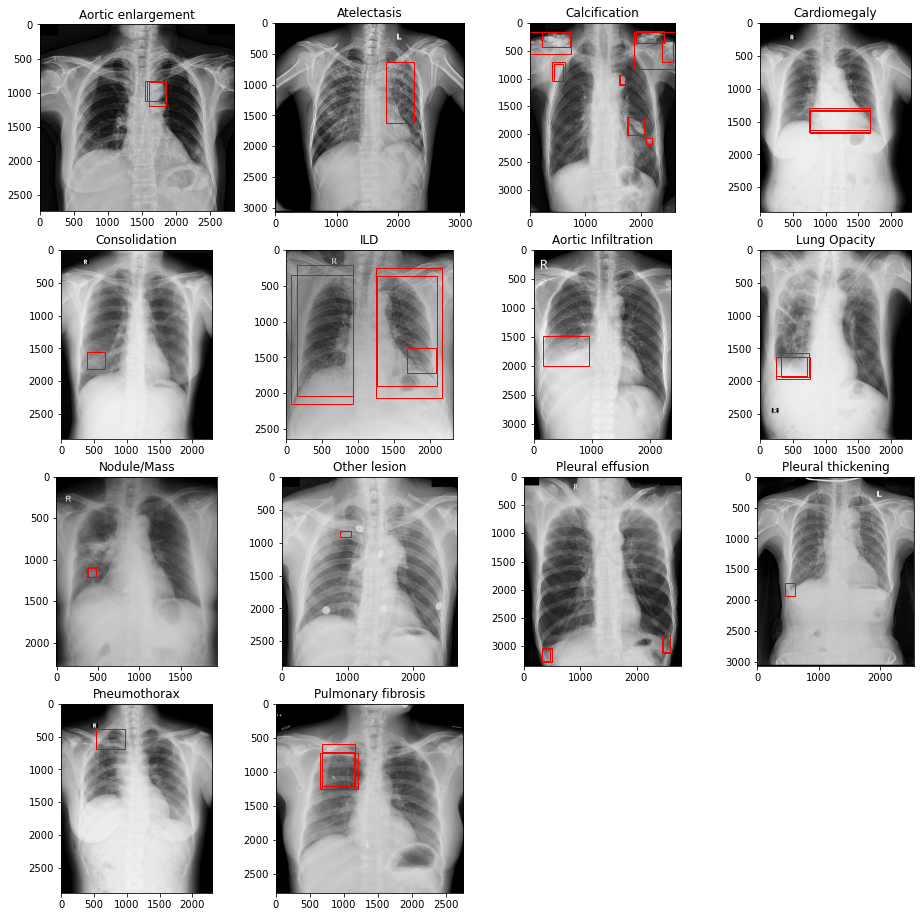

In [18]:
# PLOTS EJEMPLIFICARES DE CADA PATOLOGÍA
Data.ejemplos_random_all()